# EDA - 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from itertools import permutations

In [2]:
import warnings
warnings.filterwarnings('ignore')

<br><br>
### Import Data

In [3]:
data = pd.read_csv('../../data/cleaned/mbti_v3.csv')

In [4]:
data.head(2)

,type,posts,E_I,N_S,F_T,J_P
0,INFJ,enfp and intj moments sportscenter not top ten...,I,N,F,J
1,ENTP,i m finding the lack of me in these posts very...,E,N,T,P


<br><br>
### Examine MBTI type distributions

In [5]:
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

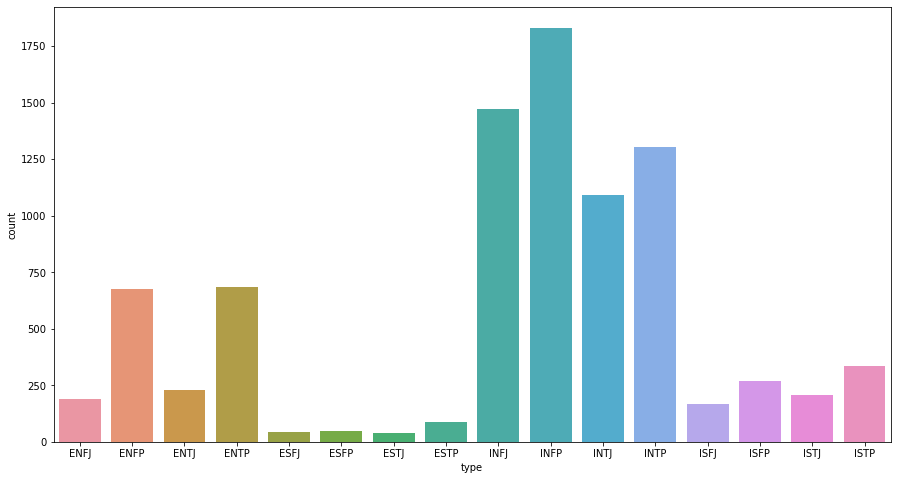

In [6]:
plt.figure(figsize=(15,8))
sns.countplot(data['type'].sort_values())

<AxesSubplot:xlabel='J_P', ylabel='count'>

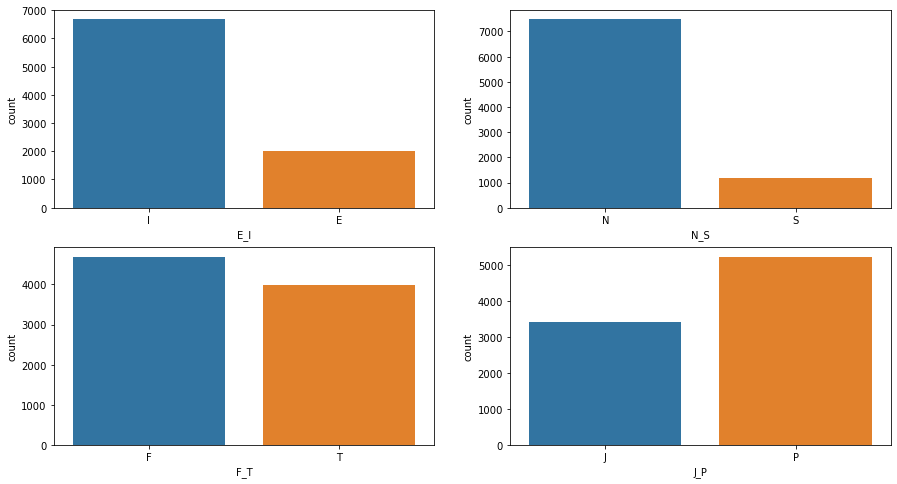

In [7]:
f, axs = plt.subplots(2, 2, figsize=(15, 8))
sns.countplot(data['E_I'], ax=axs[0][0])
sns.countplot(data['N_S'], ax=axs[0][1])
sns.countplot(data['F_T'], ax=axs[1][0])
sns.countplot(data['J_P'], ax=axs[1][1])

In [10]:
columns = ['E_I', 'N_S', 'F_T', 'J_P']

for column in columns:
    print(column, '\n')
    print("Counts:", data[column].value_counts(), '\n')
    print("Percents:", data[column].value_counts(normalize=True), '\n\n')

E_I 

Counts: I    6676
E    1999
Name: E_I, dtype: int64 

Percents: I    0.769568
E    0.230432
Name: E_I, dtype: float64 


N_S 

Counts: N    7478
S    1197
Name: N_S, dtype: int64 

Percents: N    0.862017
S    0.137983
Name: N_S, dtype: float64 


F_T 

Counts: F    4694
T    3981
Name: F_T, dtype: int64 

Percents: F    0.541095
T    0.458905
Name: F_T, dtype: float64 


J_P 

Counts: P    5241
J    3434
Name: J_P, dtype: int64 

Percents: P    0.60415
J    0.39585
Name: J_P, dtype: float64 




In [11]:
39/data.shape[0]

0.004495677233429395

<div class="alert alert-block alert-danger">
<b>Unbalanced Data:</b> Large inbalance in data observed.  Decision needs to be made on how to handle.<br>
[timestamp: 2/17-6:05p]<br>
</div>

<br><br>
### Engineer Columns of Personality Traits as Binary Values

In [6]:
# code to translate MBTI types into numeric code and add it to dataframe

mbti_binary_values = {'E': 1, 'I': 0, 'N': 1, 'S': 0, 'F': 1, 'T': 0, 'J': 1, 'P': 0}

for col in ['E_I','N_S','F_T','J_P']:
    data[f'{col}_code'] = data[col].map(mbti_binary_values)

data['type_code'] = data.iloc[:,-4:].apply(lambda x: ''.join(x.values.astype(str)), axis=1)

In [11]:
# code to create type_code dictionary

type_cols = data[['type','type_code']]
type_dict_vals = set(type_cols.apply(lambda x: ':'.join(x.values.astype(str)), axis=1))
type_code_dict = {value.split(':')[0]:value.split(':')[1] for value in type_dict_vals}

In [7]:
# code to create type_code dictionary

type_cols = data[['E_I','E_I_code']]
type_dict_vals = set(type_cols.apply(lambda x: ':'.join(x.values.astype(str)), axis=1))
type_code_dict = {value.split(':')[0]:value.split(':')[1] for value in type_dict_vals}

In [12]:
type_code_dict

{'ENFJ': '1111',
 'ENTP': '1100',
 'INTJ': '0101',
 'ISFJ': '0011',
 'ENTJ': '1101',
 'ISTJ': '0001',
 'ENFP': '1110',
 'INFJ': '0111',
 'ESFJ': '1011',
 'ESTJ': '1001',
 'ESTP': '1000',
 'ISTP': '0000',
 'ESFP': '1010',
 'INTP': '0100',
 'ISFP': '0010',
 'INFP': '0110'}

<br><br>
### TFDIF Vectorizer Model: using *stop_words="english"*

In [13]:
#TFIDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 3), min_df=10)
features = tfidf.fit_transform(data.posts).toarray()
labels = data.type_code

In [16]:
features.shape

(8675, 69016)

In [17]:
labels

0       0111
1       1100
2       0100
3       0101
4       1101
        ... 
8670    0010
8671    1110
8672    0100
8673    0110
8674    0110
Name: type_code, Length: 8675, dtype: object

In [ ]:
# sourced from: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

for type, type_code in type_code_dict.items():
    features_chi2 = chi2(features, labels == type_code)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(type))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-10:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-10:])))
    print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-10:])))

<div class="alert alert-block alert-info">
<b>Further Actions:</b><br>
* ~~Add MBTI terms and their plurals to the stopwords collection.~~<br>
* ~~find out 2w1 is ~~<br>
* decide how to handle emojis <br>
* ~~figure out what is causing the "ti" "fe" "ni" occurences~~<br>
[timestamp: 2/17-8:17p]<br><br>
<b>UPDATED:</b> Completed items struck-through<br>
[timestamp: 2/17-8:50p]
</div>

<div class="alert alert-block alert-info">
<b>Further Action:</b> ~~Consider adding secondary stopword remover into preprocessing staged prior to stripping special characters.~~ [timestamp: 2/17-8:10p]<br><br>
<b>UPDATED:</b> Prefer performance of TFIDF without the use of english stop words collection entirely. [timestamp: 2/17-8:46p]
</div>

<br><br>
### Create Custom Stopword Collection

In [159]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [148]:
# create list of mbti types and their plurals to add to stop word collection

mbti_types = [key.lower() for key in type_code_dict.keys()]
mbti_types += [(each+'s') for each in mbti_types]
mbti_types

['estj',
 'infj',
 'esfp',
 'enfp',
 'istp',
 'isfj',
 'infp',
 'entp',
 'intp',
 'intj',
 'istj',
 'isfp',
 'enfj',
 'entj',
 'esfj',
 'estp',
 'estjs',
 'infjs',
 'esfps',
 'enfps',
 'istps',
 'isfjs',
 'infps',
 'entps',
 'intps',
 'intjs',
 'istjs',
 'isfps',
 'enfjs',
 'entjs',
 'esfjs',
 'estps']

<br><br>
### TFDIF Vectorizer Model: using *stop_words=mbti_types*

In [150]:
tfidf = TfidfVectorizer(stop_words=mbti_types, ngram_range=(1, 3), min_df=10)
features = tfidf.fit_transform(data.posts).toarray()
labels = data.type_code

# sourced from: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
for type, type_code in type_code_dict.items():
  features_chi2 = chi2(features, labels == type_code)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(type))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-10:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-10:])))
  print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-10:])))

# 'ESTJ':
  . Most correlated unigrams:
. pifanjr
. cos
. wickedqueen
. abt
. sega
. yr
. wen
. thanx
. eagle
. posh
  . Most correlated bigrams:
. clean the
. and ill
. we trust
. version in
. deeply hurt
. hi this
. ill try
. the curb
. ll laugh
. aggressive behavior
  . Most correlated trigrams:
. how would know
. kiss marry bed
. behind your back
. do you generally
. these people who
. my other half
. need to control
. to be concerned
. hi this is
. passive aggressive behavior
# 'INFJ':
  . Most correlated unigrams:
. marv
. aba
. aizar
. reisiger
. infjness
. warweasel
. inforjoking
. dear
. doorslam
. ni
  . Most correlated bigrams:
. the ni
. apdenoatis 1w2
. ni fe
. 1w2 2w1
. 2w1 5w6
. dear self
. door slam
. ti loop
. vivid melody
. ni ti
  . Most correlated trigrams:
. 3w4 7w6 sx
. am the girl
. 1w9 5w6 2w1
. 5w6 2w1 so
. sx so probably
. 2w1 5w6 sx
. apdenoatis 1w2 2w1
. 5w6 sx so
. 1w2 2w1 5w6
. ni ti loop
# 'ESFP':
  . Most correlated unigrams:
. shelby
. tmlt
. whip
. kin

<div class="alert alert-block alert-success">
<b>Update:</b> Prefer the results seen from TFIDF thats not using the english stop words and only exclusing mbti_types word collection. [timestamp: 2/17-8:17p]</div>

<br><br>
### **Investigation Thread**: What does '1w2' mean?

In [156]:
data['posts'].iloc[298]

'enneagram 4w5 6w5 1w2 so sp 1 infj 67 2 infp 11 3 intj 7 mbti infj 100 enneagram 4w5 so sp 461 60 oldham sensitive leisurely idiosyncratic mbti infj t advocate protector reformer counselor psychologist confidant enneagram 4w5 so sp 4w5 6w5 1w2 philosopher activist moral alignment neutral good socionics eii ne 146 the philosopher fyodor dostoyevsky lisa simpson j k rowling typed herself as infj and i really can see that martin seems more of an intp to me my suggestions late generation x 1981 1984 generation y 1984 1995 1984 1988 1988 1995 late generation y 1995 1998 generation z 1998 2008 1998 2003 2003 2008 how i relate to the triads very strong withdrawn reactive strong frustration somehow mbti because i can t figure out my enneatype if i use the mbti function definitions not the socionic definitions my order of function development would be 1 ni 2 fe 3 ti 4 fi 5 te infj 100 3w4 totally unsure i switch between 3w4 4w3 4w5 5w4 5w6 6w5 and even somehow relate to 1w2 and 9w1 mental head

<br><br>

In [157]:
data_orig = pd.read_csv('../../data/original/mbti_1.csv')

In [158]:
data_orig['posts'].iloc[298]

"'Enneagram: 4w5-6w5-1w2 so/sp  1. INFJ 67% 2. INFP 11% 3. INTJ 7%|||MBTI: INFJ (100%) Enneagram: 4w5 so/sp (461) (60%) Oldham: Sensitive > Leisurely > Idiosyncratic|||MBTI: INFJ(-T) (Advocate, Protector, Reformer, Counselor, Psychologist, Confidant) Enneagram: 4w5 so/sp (4w5-6w5-1w2) Philosopher/Activist Moral Alignment: Neutral Good Socionics: EII-Ne...|||146 (The Philosopher): Fyodor Dostoyevsky, Lisa Simpson|||J.K.Rowling typed herself as INFJ. and I really can see that. Martin seems more of an INTP to me.|||My suggestions:  Late Generation X: 1981-1984  Generation Y: 1984-1995 (1984-1988 // 1988-1995)  Late Generation Y: 1995-1998  Generation Z: 1998-2008 (1998-2003 // 2003-2008)|||How I relate to the triads:  Very Strong: Withdrawn Reactive  Strong: Frustration  Somehow:|||MBTI, because I can't figure out my Enneatype.|||If I use the MBTI-function-definitions (NOT the Socionic definitions), my order of function development would be:  1. Ni 2. Fe 3. Ti . . . 4. Fi 5. Te|||INFJ 100

<div class="alert alert-block alert-info">
<b>Further Action:</b><br>
* ~~Ti Fe Fe Ne terms refer to individual mbti character traits, add to mbti_terms stop word collection~~ <br>
* 1w2 or any combination of #w# refer to explicit personailty traits, add to mbti_terms stop word collection <br>
* ~~'enneagram' and 'mbti' are personality classification systems, add to mbti_terms stop word collection ~~<br>
[timestamp: 2/17-8:42p]<br><br>
<b>UPDATED:</b> Completed items struck-through. [timestamp: 2/17-9:37p]
</div>